In [1]:
import pandas as pd

# Data loadng and cleaning

In [ ]:
# https://www.kaggle.com/code/siddhvr/stock-prices-maang-companies-bda-project/input
# Downloaded 3 CSV files 

In [2]:
# Load the data
d_amazon = pd.read_csv("Amazon.csv")
d_apple = pd.read_csv("Apple.csv")
d_netflix = pd.read_csv("Netflix.csv")

In [3]:
d_amazon.head()

,Open,High,Low,Close,Adj Close,Volume,Date
0,4.075000,4.478125,3.952344,4.468750,4.468750,322352000,2000-01-03
1,4.268750,4.575000,4.087500,4.096875,4.096875,349748000,2000-01-04
2,3.525000,3.756250,3.400000,3.487500,3.487500,769148000,2000-01-05
3,3.565625,3.634375,3.200000,3.278125,3.278125,375040000,2000-01-06
4,3.350000,3.525000,3.309375,3.478125,3.478125,210108000,2000-01-07


In [4]:
d_apple.head()

,Open,High,Low,Close,Adj Close,Volume,Date
0,0.936384,1.004464,0.907924,0.999442,0.850643,535796800,03-01-2000
1,0.966518,0.987723,0.903460,0.915179,0.778926,512377600,04-01-2000
2,0.926339,0.987165,0.919643,0.928571,0.790324,778321600,05-01-2000
3,0.947545,0.955357,0.848214,0.848214,0.721931,767972800,06-01-2000
4,0.861607,0.901786,0.852679,0.888393,0.756127,460734400,07-01-2000


In [5]:
d_netflix.head()

,Open,High,Low,Close,Adj Close,Volume,Date
0,1.156429,1.242857,1.145714,1.196429,1.196429,104790000,2002-05-23
1,1.214286,1.225000,1.197143,1.210000,1.210000,11104800,2002-05-24
2,1.213571,1.232143,1.157143,1.157143,1.157143,6609400,2002-05-28
3,1.164286,1.164286,1.085714,1.103571,1.103571,6757800,2002-05-29
4,1.107857,1.107857,1.071429,1.071429,1.071429,10154200,2002-05-30


In [6]:
# Select  columns
d_amazon = d_amazon[['Date', 'Close', 'Volume']]
d_apple = d_apple[['Date', 'Close', 'Volume']]
d_netflix = d_netflix[['Date', 'Close', 'Volume']]

In [7]:
# rename columns
d_amazon.columns = ['Date', 'Amazon_Close', 'Amazon_Volume']
d_apple.columns = ['Date', 'Apple_Close', 'Apple_Volume']
d_netflix.columns = ['Date', 'Netflix_Close', 'Netflix_Volume']

In [8]:
# Convert 'Date' to datetime type
amazon_date_format = "%Y-%m-%d"  # Amazon and Netflix date format
apple_date_format = "%d-%m-%Y"   # Apple date format

d_amazon['Date'] = pd.to_datetime(d_amazon['Date'], format=amazon_date_format)
d_apple['Date'] = pd.to_datetime(d_apple['Date'], format=apple_date_format)
d_netflix['Date'] = pd.to_datetime(d_netflix['Date'], format=amazon_date_format)  


# Preparation for Processing and python - Join by column (Date)

In [9]:
# Merge the DataFrames side by side by column
merged_data = pd.merge(pd.merge(d_amazon, d_apple, on='Date', how='outer'), d_netflix, on='Date', how='outer')


In [10]:
# Sort by Date
merged_data = merged_data.sort_values(by='Date')
merged_data.head()

,Date,Amazon_Close,Amazon_Volume,Apple_Close,Apple_Volume,Netflix_Close,Netflix_Volume
0,2000-01-03,4.468750,322352000,0.999442,535796800,NaN,NaN
1,2000-01-04,4.096875,349748000,0.915179,512377600,NaN,NaN
2,2000-01-05,3.487500,769148000,0.928571,778321600,NaN,NaN
3,2000-01-06,3.278125,375040000,0.848214,767972800,NaN,NaN
4,2000-01-07,3.478125,210108000,0.888393,460734400,NaN,NaN


In [12]:
# Preparation for Processing and python
merged_data['Date'] = pd.to_datetime(merged_data['Date'])
# Create new colum Year
merged_data['Year'] = merged_data['Date'].dt.year
# Select year end closing data only
year_end_dates = merged_data.groupby('Year').tail(1)
year_end_dates


,Date,Amazon_Close,Amazon_Volume,Apple_Close,Apple_Volume,Netflix_Close,Netflix_Volume,Year
251,2000-12-29,0.778125,196994000,0.265625,630336000,NaN,NaN,2000
499,2001-12-31,0.541000,120694000,0.391071,137782400,NaN,NaN,2001
751,2002-12-31,0.944500,110740000,0.255893,200726400,0.786429,11369400.0,2002
1003,2003-12-31,2.631000,106144000,0.381607,174451200,3.906429,16801400.0,2003
1255,2004-12-31,2.214500,95814000,1.150000,278588800,1.761429,9830800.0,2004
1507,2005-12-30,2.357500,108022000,2.567500,624262800,3.865714,3435600.0,2005
1758,2006-12-29,1.973000,83940000,3.030000,1076429200,3.694286,6937700.0,2006
2009,2007-12-31,4.632000,115104000,7.074286,539333200,3.802857,10415300.0,2007
2262,2008-12-31,2.564000,155844000,3.048214,607541200,4.270000,6200600.0,2008
2514,2009-12-31,6.726000,90460000,7.526071,352410800,7.870000,5291300.0,2009


In [13]:
# Drop missiing values
year_end_dates = year_end_dates.dropna()
year_end_dates

,Date,Amazon_Close,Amazon_Volume,Apple_Close,Apple_Volume,Netflix_Close,Netflix_Volume,Year
751,2002-12-31,0.944500,110740000,0.255893,200726400,0.786429,11369400.0,2002
1003,2003-12-31,2.631000,106144000,0.381607,174451200,3.906429,16801400.0,2003
1255,2004-12-31,2.214500,95814000,1.150000,278588800,1.761429,9830800.0,2004
1507,2005-12-30,2.357500,108022000,2.567500,624262800,3.865714,3435600.0,2005
1758,2006-12-29,1.973000,83940000,3.030000,1076429200,3.694286,6937700.0,2006
2009,2007-12-31,4.632000,115104000,7.074286,539333200,3.802857,10415300.0,2007
2262,2008-12-31,2.564000,155844000,3.048214,607541200,4.270000,6200600.0,2008
2514,2009-12-31,6.726000,90460000,7.526071,352410800,7.870000,5291300.0,2009
2766,2010-12-31,9.000000,69038000,11.520000,193508000,25.100000,21562800.0,2010
3018,2011-12-30,8.655000,85596000,14.464286,179662000,9.898571,21809200.0,2011


In [33]:
year_end_dates.to_csv("three stocks.csv", index=False)

In [34]:
import pandas as pd
import matplotlib.pyplot as plt


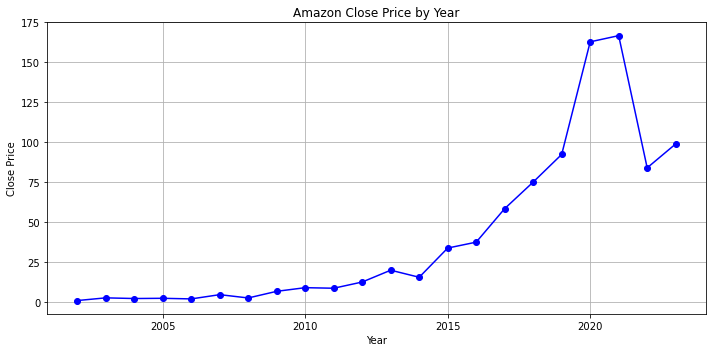

In [35]:
# Line graph for Amazon Close Price
plt.figure(figsize=(10, 5))
plt.plot(year_end_dates['Year'], year_end_dates['Amazon_Close'], marker='o', linestyle='-', color='blue')
plt.title('Amazon Close Price by Year')
plt.xlabel('Year')
plt.ylabel('Close Price')
plt.xticks()
plt.grid(True)
plt.tight_layout()
plt.show()

In [36]:
# https://www.datacamp.com/tutorial/matplotlib-time-series-line-plot

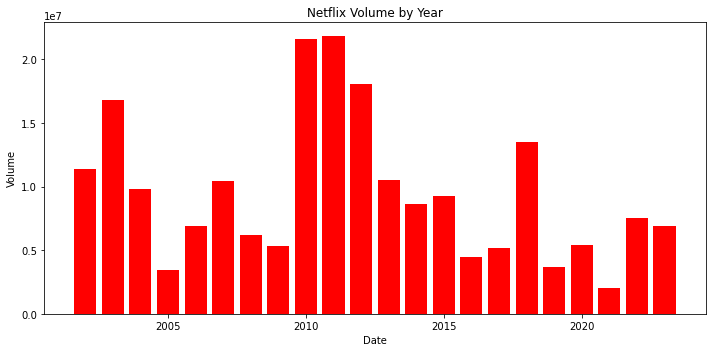

In [37]:
# Bar graph for Netflix Volume
plt.figure(figsize=(10, 5))
plt.bar(year_end_dates['Year'], year_end_dates['Netflix_Volume'], color='red')
plt.title('Netflix Volume by Year')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks()  
plt.tight_layout()
plt.show()

In [38]:
# Function to format the y-axis ticks into millions
def millions(x, pos):
    return '%1.1fM' % (x * 1e-6)

# Formatter for the y-axis
from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(millions)

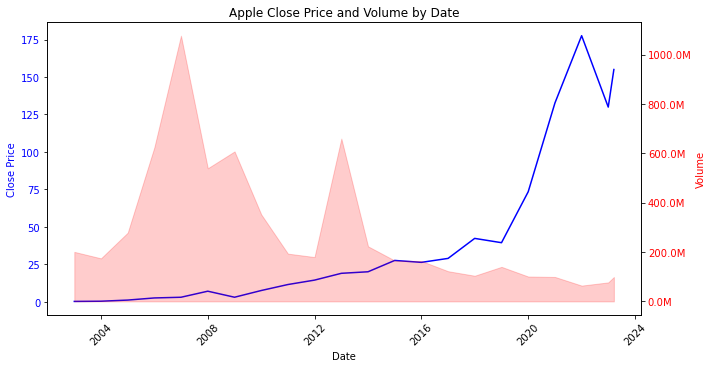

In [39]:
# Dual-axis graph for Apple Close Price and Volume
fig, ax1 = plt.subplots(figsize=(10, 5))

color = 'blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price', color=color)
ax1.plot(year_end_dates['Date'], year_end_dates['Apple_Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=45)

ax2 = ax1.twinx()  
color = 'red'
ax2.set_ylabel('Volume', color=color)  
ax2.fill_between(year_end_dates['Date'], 0, year_end_dates['Apple_Volume'], color=color, alpha=0.2)
ax2.tick_params(axis='y', labelcolor=color)
ax2.yaxis.set_major_formatter(formatter)

fig.tight_layout()  
plt.title('Apple Close Price and Volume by Date')
plt.show()

In [40]:
# https://matplotlib.org/stable/api/ticker_api.html#matplotlib.ticker.FuncFormatter
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.twinx.html

# Data preparation for tableau - Join by Rows

In [41]:
#Renaming columns to make them uniform across all dataframes
d_amazon.rename(columns={'Amazon_Close': 'Close', 'Amazon_Volume': 'Volume'}, inplace=True)
d_apple.rename(columns={'Apple_Close': 'Close', 'Apple_Volume': 'Volume'}, inplace=True)
d_netflix.rename(columns={'Netflix_Close': 'Close', 'Netflix_Volume': 'Volume'}, inplace=True)

In [43]:
# Adding 'Stock' column to each dataframe
d_amazon['Stock'] = 'Amazon'
d_apple['Stock'] = 'Apple'
d_netflix['Stock'] = 'Netflix'

In [44]:
All_data= pd.concat([d_amazon, d_apple, d_netflix], axis=0)
All_data

,Date,Close,Volume,Stock
0,2000-01-03,4.468750,322352000,Amazon
1,2000-01-04,4.096875,349748000,Amazon
2,2000-01-05,3.487500,769148000,Amazon
3,2000-01-06,3.278125,375040000,Amazon
4,2000-01-07,3.478125,210108000,Amazon
...,...,...,...,...
5236,2023-03-13,293.510010,6292400,Netflix
5237,2023-03-14,294.940002,5956700,Netflix
5238,2023-03-15,303.790009,9215300,Netflix
5239,2023-03-16,310.059998,7903700,Netflix


In [45]:
All_data.to_csv('All data for tableau.csv')